# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

FileNotFoundError: [Errno 2] No such file or directory: 'ames.csv'

In [ ]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [ ]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

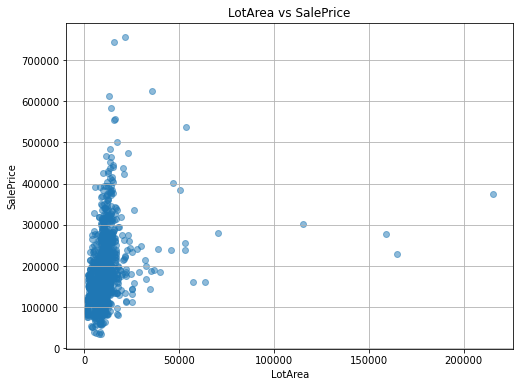

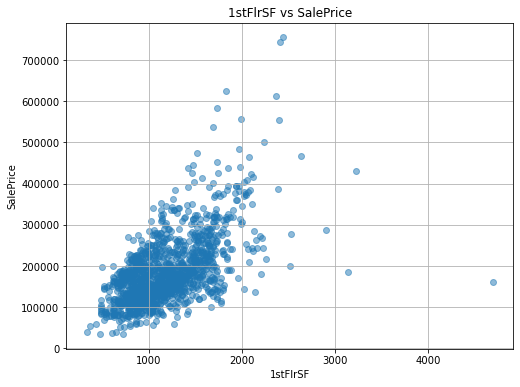

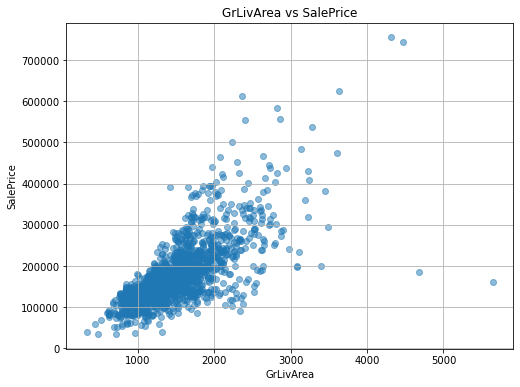

In [ ]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt 
import pandas as pd 

# Create scatter plots for each feature against SalePrice 
features =['LotArea', '1stFlrSF', 'GrLivArea']
for feature in features: 
    plt.figure(figsize=(8, 6))
    plt.scatter(ames_subset[feature], ames_subset['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice') 
    plt.xlabel(feature) 
    plt.ylabel('SalePrice')
    plt.grid(True) 
    plt.show()

In [ ]:
# Your written answer here - do these seem like good candidates for linear regression?
"""
The three seem to have a linear relationship with the Sales price
1stFlrSF and GrLivArea are good candidates for linear regression
LotArea could be more variable but still potentially useful.
"""

'\nThe three seem to have a linear relationship with the Sales price\n1stFlrSF and GrLivArea are good candidates for linear regression\nLotArea could be more variable but still potentially useful.\n'

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [ ]:
# Explore the correlation
ames_subset.corr()["SalePrice"]

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

In [ ]:
# Your code here - define y and baseline X
y =ames_subset ["SalePrice"]
# GrLivArea had the highest correlation
x_baseline =ames_subset ["GrLivArea"]

In [ ]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm 

baseline_model = sm.OLS(y,sm.add_constant(x_baseline))
baseline_model_results = baseline_model.fit()
print(baseline_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          4.52e-223
Time:                        10:54:25   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [ ]:
# Your written answer here - interpret model results
"""
The model explains 50% of variance in Saleprice and it is statistically significant overall
Both the intercept and coefficeents for GrLivArea are ststistically significant
A home with zero square feed above the ground living area would cost about $18.6k as our intercept is 18600
A unit increase in a square foot above the ground living area will increase the sale price by 107k
"""

'\nThe model explains 50% of variance in Saleprice and it is statistically significant overall\nBoth the intercept and coefficeents for GrLivArea are ststistically significant\nA home with zero square feed above the ground living area would cost about $18.6k as our intercept is 18600\nA unit increase in a square foot above the ground living area will increase the sale price by 107k\n'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [ ]:
# Your code here - define X
X = ames_subset.drop('SalePrice',axis=1)


In [ ]:
# Your code here - fit model and display results
x_all_model = sm.OLS(y,sm.add_constant(X))
x_all_result = x_all_model.fit()
x_all_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.57e-262
Time:                        10:54:25   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.003   -2.37e+04   -4944.183
LotArea        0.2841      0.145      1.956      0.051      -0.001       0.569
1stFlrSF      60.2866      4.388     13.739      0.000      51.679      68.894
GrLivArea     80.6061      3.193     25.248      0.000      74.344      86.869
==============================================================================
Omnibus:                      399.604   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13445.161
Skew:                          -0.588   Prob(JB):                         0.00
Kurtosis:                      17.820   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
"""
This model is better than the previous one as this explains 57% of the variance in Saleprice compared to the first which was 50%
It is statistically significant overall
Using alpha 0.05 , 1stFlrSF and GrLivArea are statisticall y significant unlike LotArea which is not as it is above 0.05

"""

'\nThis model is better than the previous one as this explains 57% of the variance in Saleprice compared to the first which was 50%\nIt is statistically significant overall\nUsing alpha 0.05 , 1stFlrSF and GrLivArea are statisticall y significant unlike LotArea which is not as it is above 0.05\n\n'

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

In [ ]:
X.columns

Index(['LotArea', '1stFlrSF', 'GrLivArea'], dtype='object')

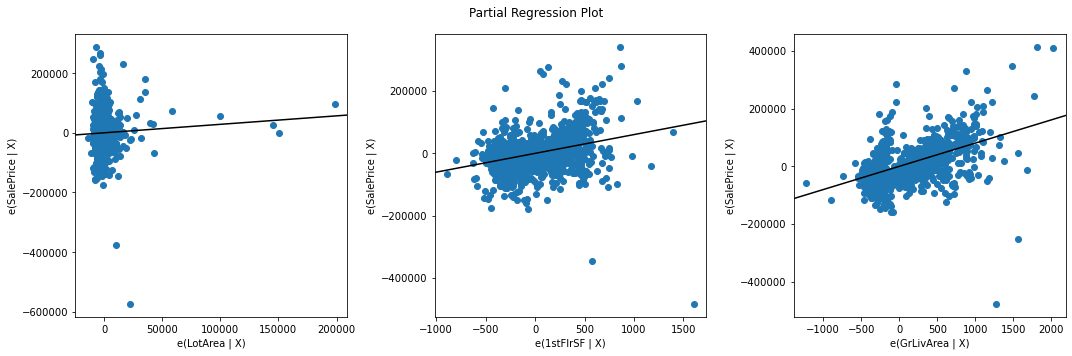

In [ ]:
# Your code here - create partial regression plots for each predictor

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    x_all_result,
    exog_idx=list(X.columns),
    grid=(1,3),
    fig=fig)
plt.tight_layout()
plt.show()

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
"""
1stFlrSF and GrLivArea would have thought to have  more overlap in the variance , since
they are both related to the square footage of the house. However it seems that
they actually contain different enough information.
Outliers in the LotArea might be have more of an impact tyhan anticipated as the line of best fit passes through them.
LotArea has much weaker predictor than the initial. 
"""

'\n1stFlrSF and GrLivArea would have thought to have  more overlap in the variance , since\nthey are both related to the square footage of the house. However it seems that\nthey actually contain different enough information.\nOutliers in the LotArea might be have more of an impact tyhan anticipated as the line of best fit passes through them.\nLotArea has much weaker predictor than the initial. \n'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [ ]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

sklearn_basemodel = LinearRegression()
sklearn_basemodel.fit(X,y)

LinearRegression()

In [ ]:
# Your code here - compare R-Squared
x_all_result.rsquared

0.5649801771384368

In [ ]:
# Your code here - compare intercept and coefficients
x_all_result.params.values

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.